<center>
    <h1>
        <font color="blue">Métodos Númericos</font>
    </h1>
    <h3>
        Trabalho 1 - Zeros de Funções
    </h3>
    <h3>
        <div style="text-align: right;">
            Carlos Eduardo Cassimiro (402714)
        </div>
    </h3>
    <h2>
        Relatório
    </h2>
</center>

==============================================================================================================

#### Sumário:
1. Métodos
2. Teste para 10 iterações
3. Teste para 25 iterações
4. Teste para 100 iterações
5. Conclusão

==============================================================================================================

## 1. Métodos

In [1]:
# Módulos utilizados
import numpy                          # Numpy para a utilização e funções matemáticas 
from scipy.misc import derivative     # Scipy.misc para utilizar a função de derivada 
import datetime                       # Datetime para utilizar as funções de tempo para regristro desempenho
import pandas                         # Pandas para organizar e exportor os resultados de forma mais legível
import matplotlib.pyplot as mtplot    # Matplotlib.pyplot para exibit o desempenho visualmete de tempo dos métodos 

#### Método da Bisseção

In [2]:
def bissecao(func, itr, a, b):
    xbsc = (a+b)/2
    if itr > 1 :
        if (func(a)*func(xbsc)) < 0:
            xbsc = bissecao(func, itr-1, a, xbsc)
        elif (func(a)*func(xbsc)) > 0:
            xbsc = bissecao(func, itr-1, xbsc, b)
    return xbsc

O método da Bisseção é um método fechado de busca de raiz, onde o usuário deve informar o intervalo em que se encontra a/uma das raizes da função informada. Para essa função implementada do método deve-se informar que se deseja encontrar a raiz (func), o número de iterações do algoritmo (itr) e o intervalo da absissa em que se encontra a/uma das raizes(a,b).<br> <br>
Implementei com essas entradas, como também todos os outros métodos, imaginando que pode ser usada para estudos e também em um ambiente de desenvolvimento onde se deseja utiliza-la como solução de um problema. Nessa perspectiva, obtei por uma abordagem funcional onde o programador pode passar diretamente para a função implementada outra função, podendo passar funções lambda/anôminas e até mesmo funções de outros pacotes como numpy e math.<br> <br>
Para a implementação do algoritmo do método da Bisseção fiz duas implementações, uma com uma abordagem recursiva e outra iterativa. Nesse relátorio trouxe a recursiva, a outra está em outro notebook jupyter dentro dos arquivos fornecidos. <br> <br>
O algoritmo começa com a indicação de um x para bisseção, como no nome sujere dá-se indicando o centro do intervalo e criando duas partições como abstração para encontrar o valor mais próximo da bisseção. <br> <br>
A parada dá recurção se dá pela primeira condicional do código(if itr > 1). A cada nova iteração da recurção, o número indicado para o número de iterações é decrescido em 1, assim a recursão termina quando o número de interações chega a 0, desempinhando todas as outras recursões anteriores e retornando o último valor de x encontrado. <br> <br>
Dada a explicação da recursão, podemos entender o método em si e sua implementação recursiva. O método da bisserção consiste em bipartir o intervalo fornecido e identificar qual partição existe um valor f(x) mais próximo de 0, esse procedimento pode ser repetido atualizando os valores dos intervalos para cada nova partição, até que atingir o número de iterações/recursões indicadas pelo usuário.

#### Método do Ponto Falso

In [3]:
def falsa_posicao(func, itr, a, b):
    xbsc = (a*func(b)-b*func(a))/(func(b)-func(a))
    if itr > 1 :
        if (func(a)*func(xbsc)) < 0:
            xbsc = falsa_posicao(func, itr-1, a, xbsc)
        elif (func(a)*func(xbsc)) > 0:
            xbsc = falsa_posicao(func, itr-1, xbsc, b)
    return xbsc

#### Método da Secante

In [4]:
def metodo_secante(func, itr, x1, x2):
    while itr>0 and func(x2)!=0.0:
        x3 = x2 - (func(x2)*(x1-x2))/(func(x1)-func(x2)) 
        x1 = x2
        x2 = x3
        itr-=1
    return x2

#### Método de Newton

In [5]:
def metodo_newton(func, itr, x):
    while itr>0 and func(x)!=0.0:
        x2 = x - (func(x) / derivative(func,x,dx=1e-9)) 
        x = x2
        itr-=1
    return x

#### Método do Ponto Fixo

In [6]:
def ponto_fixo(func, itr, x):
    cond = True
    if(cond):
        b = derivative(func,0)
        g = lambda x: ((-1*func(x))+(b*x))/b #Caso a
        if(abs(derivative(g,x,dx=1e-9))<1 and abs(derivative(g,x+1,dx=1e-9))<1):
            cond = False
    if(cond):
        c = -1*func(0)
        g = lambda x: c/((func(x)+c)/x) #Caso b
        if(abs(derivative(g,x,dx=1e-9))<1 and abs(derivative(g,x+1,dx=1e-9))<1):
            cond = False
    if(cond):
        a = lambda x: func(x)+(-1*b*x)+c
        g = lambda x: ((-1*func(x))+a(x))/((a(x)/x)) #Caso c
        if(abs(derivative(g,x,dx=1e-9))<1 and abs(derivative(g,x+1,dx=1e-9))<1):
            cond = False
    if(cond):
        return None

    for i in range(0,itr):
        x = g(x)
    return x

O método do ponto fixo é caracterizado por aproximar o valor de x da raiz através de uma função de iteração g(x), que é uma função com uma referida modificação da função f(x) da raiz desejada, e de uma reta y=x. Para essa implementação, resolvi implementar algumas funções de iteração e automatizar o processo de escolha e teste da função para saber se haverá convergência para a raiz da função, onde o usuário só precisa fornecer a função f(x), quantidade de iterações e um ponto inicial. <br> <br>
A eficiência da estrategia desse método é poder utilizar uma função g(x) para que possa convergir rapidamente para a raiz da função, entretando esta também pode ser a sua limitação e erro embutido. Existem diversos modelos para função de iteração, onde uma pode ser mais eficiente do que outra para uma determinada função f(x), ou mesmo nem funcionar para convegir. Testar todas essas funções para verificar a convergência aumenta o custo de processamento do algoritmo, consequentemente demandando mais tempo, além da dificuldade para se avaliar qual função de iteração seria mais adequada.

==============================================================================================================

#### Funções auxiliares para o relatório

In [7]:
# Dicionário para armazenar os valores do testes dos métodos
tb_tempo = {'Função':['x^2-3,5x-4','xe^0,5x +1,2x-5']}
tb_prcsao = {'Função':['x^2-3,5x-4','xe^0,5x +1,2x-5']}

# Funções f(x) que sejam utilizadas nos testes
func1 = lambda x: x**2-3.5*x-4
func2 = lambda x: x*numpy.exp(0.5*x)+1.2*x-5

In [8]:
# Função para facilitar a repetição dos testes dos métodos para diferentes números de iteração. Nela os métodos
# já estão com os intervalos definidos para cada fução e os resultados de tempo e precisão á são armazenados nas
# variáveis auxiliares.

def benchmark_metodos(itr):
    global tb_tempo
    global tb_prcsao
    global func1
    global func2
    
    # Bisseção
    inicio = datetime.datetime.now()      # Registro do tempo inicial antes da execução do método
    p1 = bissecao(func1,itr,4,5)          # Aplicação do método na primeira função
    fim = datetime.datetime.now()         # Registro do tempo final da execução
    t1 = (fim - inicio).total_seconds()   # Diferente entre o valor de tempo final e inicial em segundos

    inicio = datetime.datetime.now()
    p2 = bissecao(func2,itr,1,2)          # Aplicação do método na segunda função
    fim = datetime.datetime.now()
    t2 = (fim - inicio).total_seconds()

    tb_prcsao['Bisseção'] = func1(p1),func2(p2)   # Registro das preciões na função 1 e função 2
    tb_tempo['Bisseção'] = t1,t2                  # Registro dos tempos da função 1 e função 2

    # Ponto Falso                           # Os mesmo procedimentos são repetidos para as outras funções
    inicio = datetime.datetime.now()
    p1 = falsa_posicao(func1,itr,4,5)
    fim = datetime.datetime.now()
    t1 = (fim - inicio).total_seconds()

    inicio = datetime.datetime.now()
    p2 = falsa_posicao(func2,itr,1,2)
    fim = datetime.datetime.now()
    t2 = (fim - inicio).total_seconds()

    tb_prcsao['Ponto Falso'] = func1(p1),func2(p2)
    tb_tempo['Ponto Falso'] = t1,t2

    # Ponto Fixo
    inicio = datetime.datetime.now()
    p1 = ponto_fixo(func1,itr,4)
    fim = datetime.datetime.now()
    t1 = (fim - inicio).total_seconds()

    inicio = datetime.datetime.now()
    p2 = ponto_fixo(func2,itr,1)
    fim = datetime.datetime.now()
    t2 = (fim - inicio).total_seconds()

    tb_prcsao['Ponto Fixo'] = func1(p1),func2(p2)
    tb_tempo['Ponto Fixo'] = t1,t2

    # Método de Newton
    inicio = datetime.datetime.now()
    p1 = metodo_newton(func1,itr,4)
    fim = datetime.datetime.now()
    t1 = (fim - inicio).total_seconds()

    inicio = datetime.datetime.now()
    p2 = metodo_newton(func2,itr,1)
    fim = datetime.datetime.now()
    t2 = (fim - inicio).total_seconds()

    tb_prcsao['Newton'] = func1(p1),func2(p2)
    tb_tempo['Newton'] = t1,t2

    # Método da Secante
    inicio = datetime.datetime.now()
    p1 = metodo_secante(func1,itr,4,5)
    fim = datetime.datetime.now()
    t1 = (fim - inicio).total_seconds()

    inicio = datetime.datetime.now()
    p2 = metodo_secante(func2,itr,1,2)
    fim = datetime.datetime.now()
    t2 = (fim - inicio).total_seconds()

    tb_prcsao['Secante'] = func1(p1),func2(p2)
    tb_tempo['Secante'] = t1,t2
    
# Função para auxiliar nas plotagens dos gráficos dos tempos desempenhados pelos métodos
def plot_benchmark():
    global tb_tempo
    a = []
    b = []
    
    a.append(tb_tempo['Bisseção'][0]) 
    a.append(tb_tempo['Ponto Falso'][0]) 
    a.append(tb_tempo['Ponto Fixo'][0]) 
    a.append(tb_tempo['Newton'][0]) 
    a.append(tb_tempo['Secante'][0])

    b.append(tb_tempo['Bisseção'][1]) 
    b.append(tb_tempo['Ponto Falso'][1]) 
    b.append(tb_tempo['Ponto Fixo'][1]) 
    b.append(tb_tempo['Newton'][1]) 
    b.append(tb_tempo['Secante'][1])

    mtplot.figure(figsize=(9, 3))
    mtplot.subplot(121)
    mtplot.title('Func1: x^2-3,5x-4')
    mtplot.bar(['Bis','P.Fal','P.Fix','New','Sec'],a)
    mtplot.subplot(122)
    mtplot.title('Func2: xe^0,5x +1,2x-5')
    mtplot.bar(['Bis','P.Fal','P.Fix','New','Sec'],b, color='orange')
    mtplot.show()

==============================================================================================================

#  2. Teste com 10 Iterações

#### Observações:
Os teste foram feito em um notebook com processador Intel® Celeron(R) CPU 1000M @ 1.80GHz × 2, memória RAM utilizável de 5,4 GiB, sistema operacional Ubuntu 20.04.2 LTS 64 bits, utilizando o navegador Firefox como interface para o Jupyter Notebook Python. Também vale ressaltar que o notebook tem 7 anos de uso, e que entre os mesmo testes os valores de tempo variavam um pouco, principalmente quando haviam vários programas e abas no navegador abertos. <br>

In [9]:
benchmark_metodos(10)

### Aproximação dos métodos para 10 iterações

In [10]:
pandas.DataFrame(data=tb_prcsao)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",-0.001647,-2.414726e-10,-3.213683e-07,1.776357e-15,-5.321041e-10
1,"xe^0,5x +1,2x-5",-0.000516,-8.304336e-09,-1.664011e-03,8.881784e-16,-1.197275e-07


Com apenas 10 iterações, o método da Bisseção apresentou a menor precisão na aproximação da raiz, onde o método de Newton apresentou a melhor a aproximação. Dentre os métodos mais "arrojados", o método do Ponto Fixo acabou apresentando menor precisão.

### Tempo em segundos dos métodos para 10 iterações

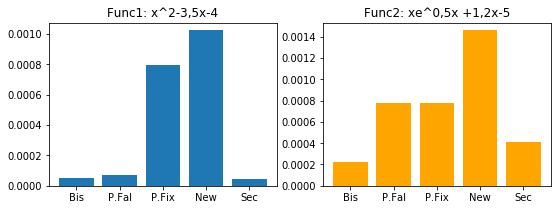

In [11]:
plot_benchmark()

In [12]:
pandas.DataFrame(data=tb_tempo)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",0.000053,0.000069,0.000793,0.001022,0.000043
1,"xe^0,5x +1,2x-5",0.000226,0.000773,0.000775,0.001458,0.000411


Para 10 iterações, apesar de menos preciso, o método da Bisseção apresentou o ménor tempo em média para as aproximações, mostrando quem apesar de não ser tão preciso quando os outros métodos, ao menos não possui tantos custos computacionais quando medido por iteração. Entretando, podemos perceber que mudando o parametro de observação para tolerância, o método da Bissão possivelmente acaba sendo o mais custoso e demorado. <br> <br>
Em uma análise amortizada, o método do Ponto Falso aparenta ter o melhor custo beneficio médio para essas duas funções e em poucos iterações. <br>
Apesar do método de Newton ter apresentado a melhor aproximação, o seu tempo em média para as duas funções acabou sendo o maior, possivelmente devido ao custo de se calcular uma derivada a cada iteração.

==============================================================================================================

#  3. Teste com 25 Iterações

In [13]:
benchmark_metodos(25)

### Aproximação dos métodos para 25 iterações

In [14]:
pandas.DataFrame(data=tb_prcsao)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",1.257910e-07,1.776357e-15,1.776357e-15,1.776357e-15,1.776357e-15
1,"xe^0,5x +1,2x-5",-7.651150e-08,8.881784e-16,2.813551e-08,-8.881784e-16,8.881784e-16


Podemos ver que o método da bisserção apresentou as aproximações menos precisas em relação aos outros métodos. Onde o método de Newton, Secante e Ponto falso tiveram aproxiomações melhores do que a do  Ponto Fixo. Com isso, podemos perceber um erro associado com o método do ponto fixo para essa função, possivelmente associado com a limitação da quantidade de funções de iteração(g(x)) implementadas.

### Tempo em segundos dos métodos para 25 iterações

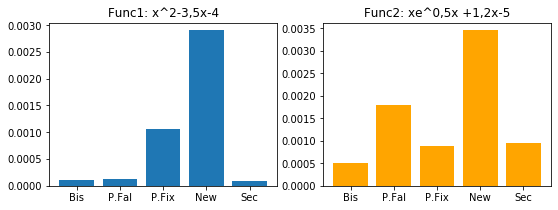

In [15]:
plot_benchmark()

In [16]:
pandas.DataFrame(data=tb_tempo)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",0.000108,0.000134,0.001052,0.002899,0.000089
1,"xe^0,5x +1,2x-5",0.000511,0.001789,0.000889,0.003455,0.000960


Os tempos em segundos para as 25 iterações mostrou-se bem diferente até mesmo para as mesma funções. Onde, considerando também a sua precisão, o método da secante se tornou mais eficaz para essas referidas funções testadas e com esse número de iterações. Apesar do método de Newton ter mostrado boa precisão, estes foi o mais demorado para esse teste, possivelmente decorrente do custo de se calcular a derivada a cada iteração.

==============================================================================================================

#  4. Teste com 100 Iterações

In [17]:
benchmark_metodos(100)

### Aproximação dos métodos para 100 iterações

In [18]:
pandas.DataFrame(data=tb_prcsao)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",-3.552714e-15,1.776357e-15,1.776357e-15,1.776357e-15,1.776357e-15
1,"xe^0,5x +1,2x-5",-8.881784e-16,8.881784e-16,-8.881784e-16,8.881784e-16,-8.881784e-16


Com uma quantidade mais elevada de iterações, os valores de aproximação foram quase todos iguais. Somente no método da Bisseção para a primeira função que o método aparesentou uma aproximação menor do que os demais.

### Tempo em segundos dos métodos para 100 iterações

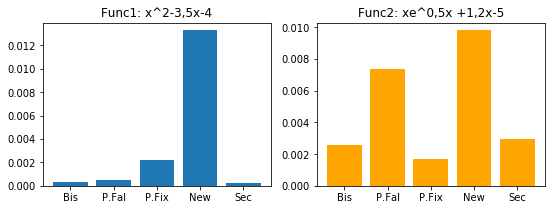

In [19]:
plot_benchmark()

In [20]:
pandas.DataFrame(data=tb_tempo)

,Função,Bisseção,Ponto Falso,Ponto Fixo,Newton,Secante
0,"x^2-3,5x-4",0.000343,0.000465,0.002189,0.013266,0.000232
1,"xe^0,5x +1,2x-5",0.002595,0.007341,0.001704,0.009790,0.002946


Considerando a média de tempo e as precisões atingidas nas aproximações, o método com melhor custo beneficio foi o método da Secante e em seguida o método do Ponto Fixo. O método de Newton novamente apresentou os maiores tempo de processamento que os demais. 

==============================================================================================================

#  5. Conclusão

Como dito anteriormente, realizei as implementações com a motivação que os métodos devessem acelerar algum desenvolvimento ou estudo de funções com a sua utilização, dessa maneira, deleguei ao código todo o trabalho para o desenvolvimento dos métodos, sem pedir ao usuário derivadas de funções ou funções de iteração já montadas como no caso do método do Ponto Fixo. Por essa razão também optei por fazer a passagem das funções com uma apordagem de porgramação funcional, passando a função diretamente para as implementações dos métodos. <br> <br>
Com as analises feitas através dos dados disponíveis do testes, podemos perceber que a implementação do método da Secante demonstrou melhor permance, realizando as melhores aproximações com menores tempos. Em contra mão, o seu método semelhante, o método de Newton, apesar de ter performador boas aproximações demonstrou os piores tempo entre todos os métodos implementados. <br> <br>
As diferenças nas performances também se devem as referidas implentações deste trabalho. O que mais diferencia o método de Newton dos outros métodos é a presença de um cálculo de derivada em cada iteração. Na presente implementação, a função que encontrei para a derivada refaz a derivada da função a cada iteração, não somente o calculo para o 'x' da iteração, pois não encontrei outra função disponivel na linguagem para poder utilizar. Haviam outras funções de diferenciação, mas não serviam para a aplicação deste código. Outra solução disponivel poderia ser a computação simbálica, mas acredito que também seria custosa para o método. <br> <br>
O método do Ponto Fixo, apesar de aparentar ser uma solução robusta e eficaz, acabou não apresentando tão bons resultados como esperado para esta implementação. Na presente implementação houve relativa dificuldade para implementação das possíveis funções de iteração, onde a solução encontrada para simulas operações feitas semelhantes a computação simbólica acarretaram em mais cálculos. A solução consistiu em obter os termos da função e manipulá-los com outras operações na função original para obter as funções de iteração. Apesar de automatizar todo o processo do método com testes das funções de iteração, a implementação não tem a capacidade de escolher a melhor função de iteração, somente testar qual a primeira função de iteração que converge para a raíz. Outra limitação da implementação é a quantidade de funções implementadas, somentes 3, podendo haver funções não convirjam para a raiz com as funções de iteração disponíveis. <br> <br>
A complexidade dos algoritmos é O(itr) = O(n), pois como não há vetores e nem mais que um laço ou recursão envolvidos nos métodos, a complexidade se dá apenas pelo número de iterações fornecidas pelo usuário. <br> <br>
Foi realizado outro teste para 1000 iterações, todos os métodos obtiveram a mesma precisão, entretanto, o método do Ponto Fixo mostrou-se mais rápido do que os demais. Com essa observação, podemos avaliar que o método do Ponto Fixo, quando realizado com uma função de iteração adequada, pode apresentar desempenho melhor quando realizado com uma grande quantidade de iterações para se obter uma alta precisão no valor de x da raiz da função.

==============================================================================================================